In [ ]:
!pip install -q xlrd
!git clone https://github.com/Lossophy/BINA-Projekt.git

Cloning into 'BINA-Projekt'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 131 (delta 67), reused 34 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (131/131), 3.07 MiB | 4.07 MiB/s, done.
Resolving deltas: 100% (67/67), done.


Vorbereitung der benötigten Bibliotheken

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import time
from IPython.display import display, clear_output

Import & Überprüfung der der Daten

In [ ]:
# Datei einlesen
df = pd.read_csv('/content/BINA-Projekt/Data/ogd115_gest_bilanz.csv')

# Daten überprüfen
print(df.head())


   Jahr           Rubrik Energietraeger        TJ
0  1980  Bruttoverbrauch   Elektrizität  -29450.0
1  1980  Bruttoverbrauch  Erdölprodukte  321250.0
2  1980  Bruttoverbrauch      Fernwärme       0.0
3  1980  Bruttoverbrauch            Gas   36280.0
4  1980  Bruttoverbrauch    Holzenergie   26280.0


**Beschreibung der Daten:**
Die Daten wurden von der  SFOE (Swiss Federal Office of Energy) heruntergeladen. Unter folgendem Link https://opendata.swiss/en/dataset/energiebilanz-der-schweiz/resource/1957ce24-bc06-40f8-a630-6db5bee3c419.


---
Der Datensatz hat die Spalten "Jahr", "Rubrik", "Energieträger" und "TJ".

Die Daten sind vom Jahr 1980 bis und mit 2023.

Es werden die folgenden Rubriken unterschieden:


*   Bruttoverbrauch =
*   Eigenverbrauch des Energiesektors, Netzverluste, Verbrauch der Speicherungen =
*   Endverbrauch - Dienstleistungen =
*   Endverbrauch - Haushalte =
*   Endverbrauch - Industrie =
*   Endverbrauch - Statistische Differenz inkl. Landwirtschaft =
*   Endverbrauch - Total =
*   Endverbrauch - Verkehr =
*   Energieumwandlung - Diverse Erneuerbare =
*   Energieumwandlung - Gaswerke =
*   Energieumwandlung - Kernkraftwerke =
*   Energieumwandlung - Raffinerien =
*   Energieumwandlung - Wasserkraftwerke
*   Energieumwandlung - konventionell-thermische Kraft-, Fernheiz- und Fernheizkraftwerke =
*   Export =
*   Import =
*   Inlandproduktion =
*   Lagerveränderung =
*   Nichtenergetischer Verbrauch =




1 Terajoule entspricht dabei 277'777,777 KWh. Zur besseren Einordnung kann die grösse der Energieeinheit mit folgendem Durchschnittswert dargestellt werden. Ein durchschnitts Haushalt mit 4 Personen in der Schweiz braucht ca. 4'500 KWh pro Jahr (https://www.energieheld.ch/renovation/nachhaltig-leben/energieverbrauch).

Als erstes möchten wir sehen, wie sich der allgemeine Verbrauch je Energieträger verändert hat.

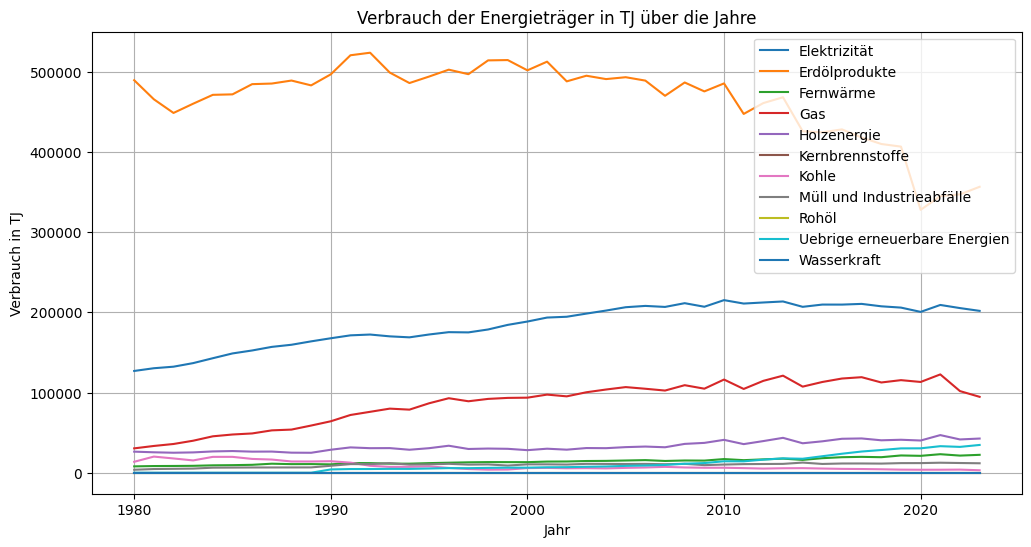

In [ ]:
# Daten filtern und vorbereiten
df_filtered = df[df['Energietraeger'].isin(['Elektrizität','Erdölprodukte','Fernwärme','Gas','Holzenergie','Kernbrennstoffe','Kohle','Müll und Industrieabfälle','Rohöl','Uebrige erneuerbare Energien','Wasserkraft'])]
df_filtered = df[df['Rubrik'].isin(['Endverbrauch - Total'])]
df_filtered = df_filtered.groupby(['Jahr', 'Energietraeger'])['TJ'].sum().reset_index()
df_pivot = df_filtered.pivot(index='Jahr', columns='Energietraeger', values='TJ')

# Plot erstellen
plt.figure(figsize=(12, 6))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.xlabel('Jahr')
plt.ylabel('Verbrauch in TJ')
plt.title('Verbrauch der Energieträger in TJ über die Jahre')
plt.legend()
plt.grid()
plt.show()


Um einen besseren Überblick über die genauere Verteilung der Energieträger zu erhalten, wollen wir nun Pie-Charts pro Jahr anschauen.

In [ ]:
# Interaktive Funktion definieren
def plot_daten(jahr):
    gefiltert = df[(df['Jahr'] == jahr) & (df['Rubrik'] == 'Endverbrauch - Total')]

    if gefiltert.empty:
        print("Keine Daten für diese Kombination.")
        return

    # Gruppieren nach Energieträger und Summe von TJ berechnen
    energie_verbrauch = gefiltert.groupby('Energietraeger')['TJ'].sum()

    # Pie-Chart erstellen
    plt.figure(figsize=(10, 6))  # Größe des Diagramms anpassen
    plt.pie(energie_verbrauch, labels=energie_verbrauch.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Verbrauch der Energieträger im Jahr {jahr}")
    plt.axis('equal')  # Gleichmäßiger Kreis
    plt.show()

#Interaktive Ansicht verbinden - These lines were incorrectly indented
jahr_widget = widgets.IntSlider(min=df['Jahr'].min(), max=df['Jahr'].max(), step=1, description='Jahr:') #Defining jahr_widget within the scope of the function ensures its availability
ui = widgets.VBox([jahr_widget])
out = widgets.interactive_output(plot_daten, {'jahr': jahr_widget,})

display(ui, out) #Calling display outside the function ensures it is only run once and displays the interactive output.

Output()

Nur bestimmte %-Angaben werden angezeigt

In [14]:
# prompt: pie cahrt mit eigener legende & anzeige nur bei bestimmten prozentsätzen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


def plot_daten(jahr):
    gefiltert = df[(df['Jahr'] == jahr) & (df['Rubrik'] == 'Endverbrauch - Total')]

    if gefiltert.empty:
        print("Keine Daten für diese Kombination.")
        return

    energie_verbrauch = gefiltert.groupby('Energietraeger')['TJ'].sum()

    # Calculate percentages
    percentages = energie_verbrauch / energie_verbrauch.sum() * 100

    # Filter out small slices
    filtered_energie_verbrauch = energie_verbrauch[percentages >= 1]  # Es werden nur Daten mit bestimmter %-Angabe angezeigt

    # Create custom legend labels
    legend_labels = [f'{label}: {percentages[label]:.1f}%' for label in filtered_energie_verbrauch.index]

    plt.figure(figsize=(10, 6))
    wedges, texts, autotexts = plt.pie(filtered_energie_verbrauch, autopct='', startangle=90) # autopct is empty to add labels later
    plt.title(f"Verbrauch der Energieträger im Jahr {jahr}")
    plt.axis('equal')

    # Add custom legend
    plt.legend(wedges, legend_labels, title="Energieträger", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


    plt.show()

#Interaktive Ansicht verbinden - These lines were incorrectly indented
jahr_widget = widgets.IntSlider(min=df['Jahr'].min(), max=df['Jahr'].max(), step=1, description='Jahr:') #Defining jahr_widget within the scope of the function ensures its availability
ui = widgets.VBox([jahr_widget])
out = widgets.interactive_output(plot_daten, {'jahr': jahr_widget,})

display(ui, out) #Calling display outside the function ensures it is only run once and displays the interactive output.

Output()